# Tool to extract usefull information from mlperf trace

In [58]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(12, 8)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [2]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [5]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [9]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,1.361400e+04,4.140000e+02,13200.0,1.320000e+04,13200.000000
mean,1.684820e+06,3.507169e+03,797.0,4.960269e+10,49.602690
std,9.609640e+06,7.115450e+04,0.0,2.555349e+10,25.553494
min,1.787079e+05,4.148000e+00,797.0,7.429282e+09,7.429281
25%,1.787079e+05,7.940000e+00,797.0,2.860138e+10,28.601384
50%,1.787079e+05,9.186000e+00,797.0,4.992784e+10,49.927835
75%,1.787079e+05,1.161900e+01,797.0,7.153110e+10,71.531099
max,9.084666e+07,1.447790e+06,797.0,9.066796e+10,90.667955


In [10]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [11]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
6806,1.787079e+05,Sample,NaN,797.0,4.992784e+10,49.927835
8794,1.787079e+05,Sample,NaN,797.0,6.305238e+10,63.052379
8795,1.787079e+05,Sample,NaN,797.0,6.305238e+10,63.052379
8796,1.787079e+05,Sample,NaN,797.0,6.305238e+10,63.052379
8797,1.787079e+05,Sample,NaN,797.0,6.305238e+10,63.052379
...,...,...,...,...,...,...
13481,9.080584e+07,QuerySamplesComplete,12.002,NaN,NaN,NaN
13514,9.081709e+07,QuerySamplesComplete,8.058,NaN,NaN,NaN
13547,9.082789e+07,QuerySamplesComplete,5.739,NaN,NaN,NaN
13580,9.083915e+07,QuerySamplesComplete,7.397,NaN,NaN,NaN


In [12]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
6806,178707.896,Sample,NaN,797.0,4.992784e+10,49.927835
8794,178707.896,Sample,NaN,797.0,6.305238e+10,63.052379
8795,178707.896,Sample,NaN,797.0,6.305238e+10,63.052379
8796,178707.896,Sample,NaN,797.0,6.305238e+10,63.052379
8797,178707.896,Sample,NaN,797.0,6.305238e+10,63.052379
...,...,...,...,...,...,...
4403,178707.896,Sample,NaN,797.0,3.509759e+10,35.097584
4404,178707.896,Sample,NaN,797.0,3.509759e+10,35.097584
4405,178707.896,Sample,NaN,797.0,3.509759e+10,35.097584
4395,178707.896,Sample,NaN,797.0,3.509759e+10,35.097584


In [13]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,178709.086,IssueQuery,1447790.046,NaN,NaN,NaN


In [14]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [15]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
33,7.607991e+06,QuerySamplesComplete,22.802,NaN,NaN,NaN
66,7.623653e+06,QuerySamplesComplete,12.016,NaN,NaN,NaN
99,7.642670e+06,QuerySamplesComplete,10.697,NaN,NaN,NaN
132,7.914457e+06,QuerySamplesComplete,13.398,NaN,NaN,NaN
165,7.943394e+06,QuerySamplesComplete,10.934,NaN,NaN,NaN
...,...,...,...,...,...,...
13481,9.080584e+07,QuerySamplesComplete,12.002,NaN,NaN,NaN
13514,9.081709e+07,QuerySamplesComplete,8.058,NaN,NaN,NaN
13547,9.082789e+07,QuerySamplesComplete,5.739,NaN,NaN,NaN
13580,9.083915e+07,QuerySamplesComplete,7.397,NaN,NaN,NaN


# offline scenario

In [86]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"
all_files = glob.glob(path + "*none.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,16,1,144.156602,116.061031,115.852239,183.789083,206.684312,217.913017,226.579384,227.254433
1,resnet,none,32,1,offline,32,1,146.240909,116.773464,116.781502,183.360088,204.920411,216.489519,223.659858,224.013887
2,resnet,none,32,1,offline,64,1,136.279218,128.958739,129.268203,199.973150,224.654517,235.129396,240.249047,240.403644
3,resnet,none,32,8,offline,16,1,177.419167,94.021584,93.946409,148.080030,166.177471,175.531116,182.330208,184.282871
4,resnet,none,32,8,offline,32,1,178.881112,94.853941,94.550645,149.153771,166.504741,175.429249,181.429469,183.083305


In [87]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,16,1,144.156602,116.061031,115.852239,183.789083,206.684312,217.913017,226.579384,227.254433
1,resnet,none,32,1,offline,32,1,146.240909,116.773464,116.781502,183.360088,204.920411,216.489519,223.659858,224.013887
2,resnet,none,32,1,offline,64,1,136.279218,128.958739,129.268203,199.973150,224.654517,235.129396,240.249047,240.403644
3,resnet,none,32,8,offline,16,1,177.419167,94.021584,93.946409,148.080030,166.177471,175.531116,182.330208,184.282871
4,resnet,none,32,8,offline,32,1,178.881112,94.853941,94.550645,149.153771,166.504741,175.429249,181.429469,183.083305
5,resnet,none,32,8,offline,64,1,176.380463,98.661295,99.502453,153.303118,171.642965,180.675696,184.794306,185.737612
6,resnet,none,32,32,offline,16,1,179.498925,91.424198,91.448540,144.707657,162.459119,171.445270,178.509154,180.789491
7,resnet,none,32,32,offline,32,1,177.303140,94.454720,93.924684,148.515821,165.952372,176.178104,182.707218,184.481999
8,resnet,none,32,32,offline,64,1,172.882740,99.296800,99.187403,152.443075,173.035522,183.576354,187.259016,189.497538


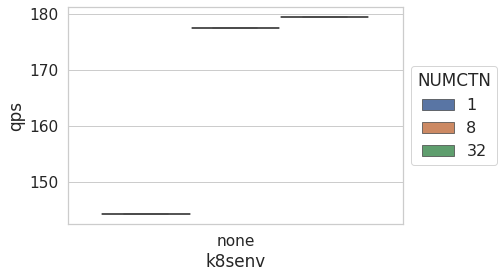

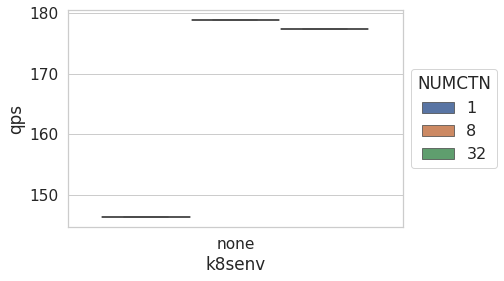

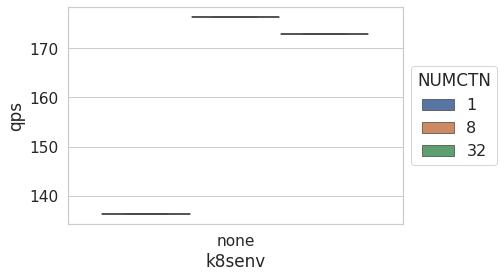

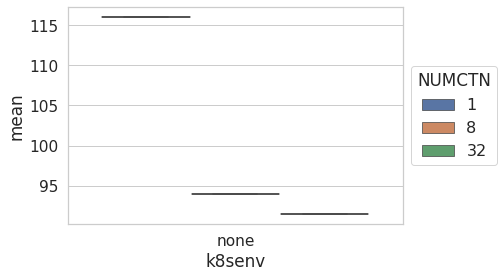

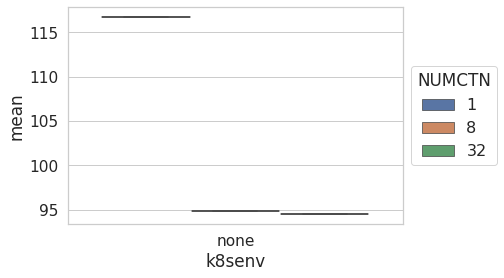

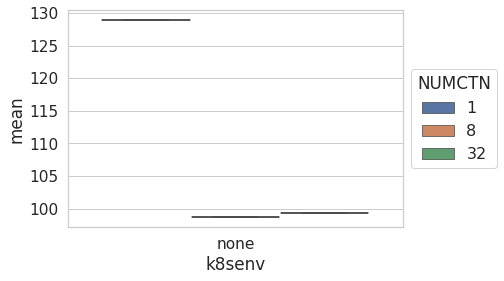

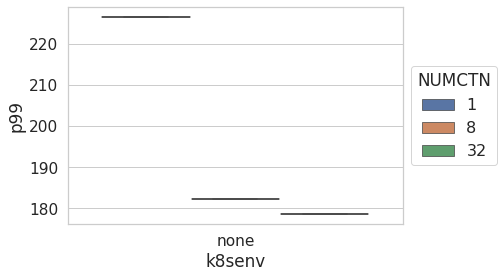

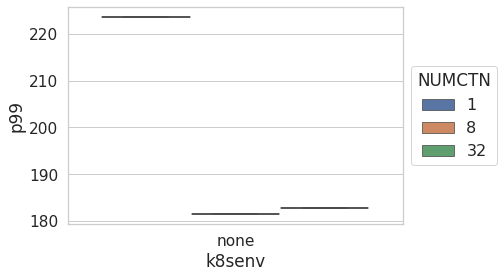

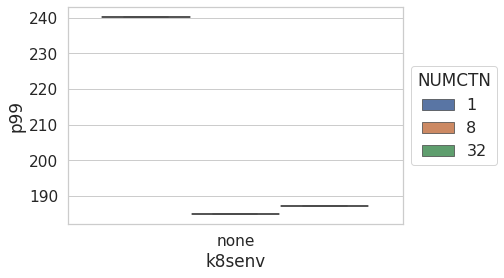

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns

for x in ['qps','mean','p99']:
    for cbatch in [16,32,64]:
        for model_name in ['resnet']:
            list_traces = []
#             for numctn in [1,2,4,8,16,32]: 
            dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
#                             (dfg['numctn']==numctn) &\
                        ((dfg['k8senv']=='none') |\
                         (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#             print(dfg_bench)

            sns.boxplot(x = dfg_bench['k8senv'],
                        y = dfg_bench[x],
                        hue = dfg_bench['numctn'])
            plt.legend(prop={'size': 16}, title = 'NUMCTN',loc='center left', bbox_to_anchor=(1, 0.5) )
            plt.show()


In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

for x in ['qps','mean','p99']:
    for cbatch in [16,32]:
        for model_name in ['resnet']:
            list_traces = []
            for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']=='none') |\
                             (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)


                #data
                trace = go.Scatter(
                    name="ctn"+str(numctn),
                    x=[ 'none','cpumem','cpu'],
                    y= dfg_bench[x].values.tolist(),
        #             error_y = dict(type='data', array=df1_bench['model_time_std'].values.tolist()),
                    opacity=0.7,
                    mode='markers'
                )
                list_traces.append(trace)



            #layout
            layout = go.Layout(
                title={
                    'text': "exp18(cpu32)= inter16,intra32 -> inter1,intra2; restapi=32" ,
                    'y':0.85,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                width=1000,
                height=460,
                xaxis=dict(
                    title= "scenarios",
                    tickvals=[ 'none','cpumem','cpu'],
                    titlefont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    )
                ),
                yaxis=dict(
                    title= x+"batch"+str(cbatch),
                    automargin=True,
                    titlefont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),    
                ),
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)',
                    font = dict( size = 28)
                ),
                barmode='group',
                bargap=0.15,
                bargroupgap=0.08
        #         legend_orientation="h"
            )

        data = list_traces
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(legend_orientation="h")
        fig.show()    

    #     fig.write_image(path + model_name + k8senv +'.pdf')

In [82]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=[
    'none-resnet-1-32-O-32-1',
      'none-resnet-2-32-O-32-1',
            'none-resnet-4-32-O-32-1',
           'none-resnet-8-32-O-32-1',
      'none-resnet-16-32-O-32-1',
      'none-resnet-32-32-O-32-1'
]
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["IssueQuery"])]
    print(df1)
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('IssueQuery duration (usec)');
#     x=x+1
#     plt.show()

# df1['delta'].describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts        name           dur  issue_start_ns  complete_ns  \
12672  186615.695  IssueQuery  8.867881e+07             NaN          NaN   

       issue_to_done  
12672            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
           ts        name          dur  issue_start_ns  complete_ns  \
0  182165.352  IssueQuery  1545013.545             NaN          NaN   

   issue_to_done  
0            NaN  
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
          ts        name          dur  issue_start_ns  complete_ns  \
0  214165.12  IssueQuery  1558214.174

In [280]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
80.441
7.0675
9.924232910156237
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
97.93
6.148
7.630560546875
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
97.7
6.955500000000001
8.687032714843765


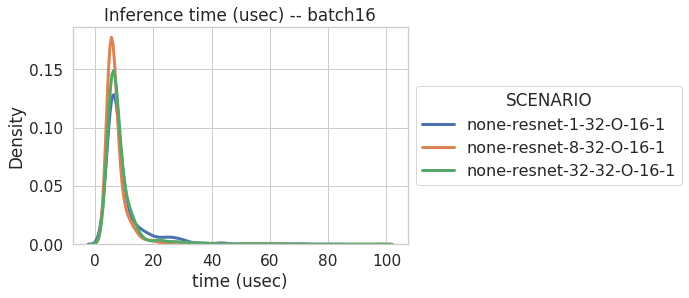

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
90.777
8.618500000000001
11.071341796875005
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
75.481
9.256499999999999
10.816690429687496
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
67.065
8.9385
11.121644531249997


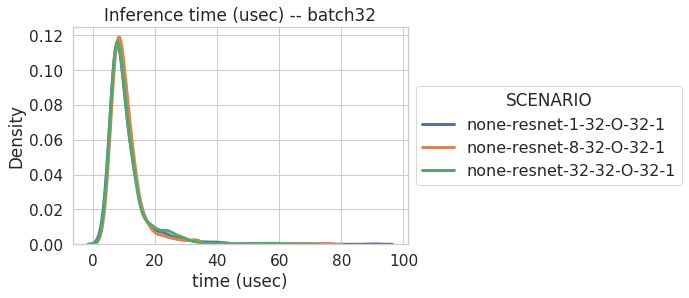

In [81]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['16','32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-1',
#           'none-resnet-2-32-O-'+batch+'-1',
#                 'none-resnet-4-32-O-'+batch+'-1',
               'none-resnet-8-32-O-'+batch+'-1',
#           'none-resnet-16-32-O-'+batch+'-1',
          'none-resnet-32-32-O-'+batch+'-1'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(len(df1))
        print(max(df1['dur']))
        print(np.median(df1['dur']))
        print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['dur'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-16-1/mlperf_log_trace.json'

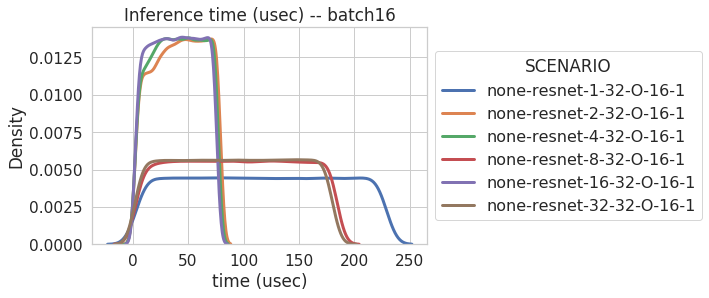

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-O-32-1/mlperf_log_trace.json'

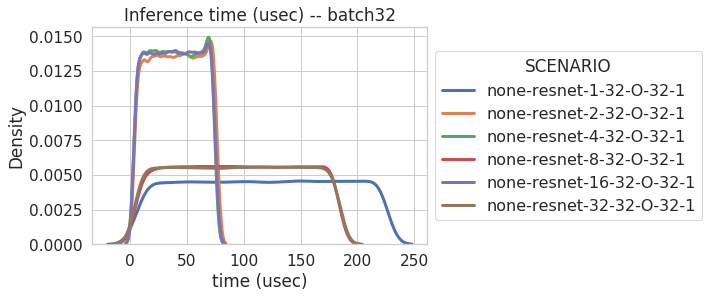

In [78]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
# for batch in ['1','2','4','8','16','32']:
for batch in ['16','32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-1',
          'none-resnet-2-32-O-'+batch+'-1',
                'none-resnet-4-32-O-'+batch+'-1',
               'none-resnet-8-32-O-'+batch+'-1',
          'none-resnet-16-32-O-'+batch+'-1',
          'none-resnet-32-32-O-'+batch+'-1'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-

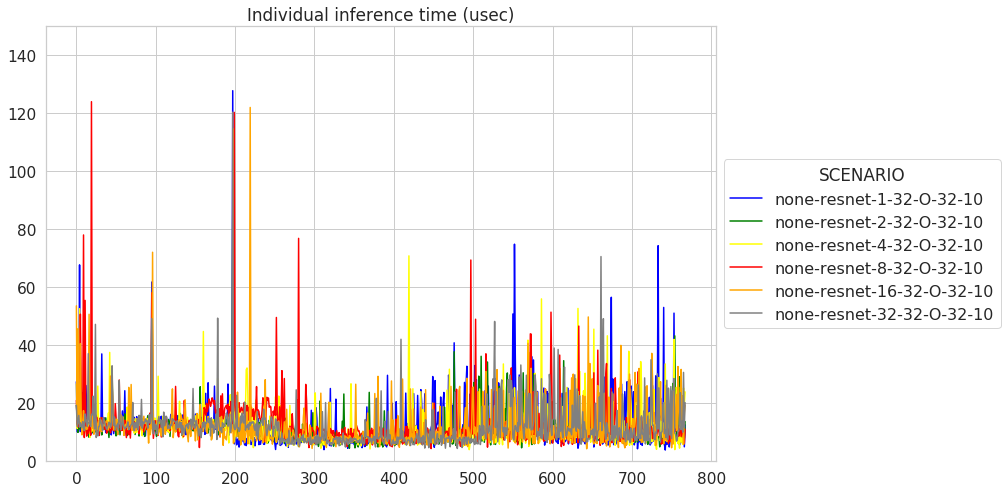

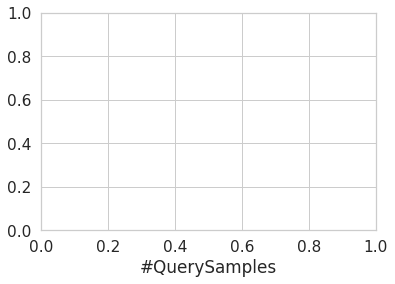

In [74]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['32']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-10',
          'none-resnet-2-32-O-'+batch+'-10',
                'none-resnet-4-32-O-'+batch+'-10',
               'none-resnet-8-32-O-'+batch+'-10',
          'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
        ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-16-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts    name  dur  issue_start_ns   complete_ns  issue_to_done
0      192136.164  Sample  NaN           514.0  1.944692e+09       1.944692
22867  192136.164  Sample  NaN           514.0  1.518066e+11     151.806580
22866  192136.164  Sample  NaN           514.0  1.518066e+11     151.806580
22865  192136.164  Sample  NaN           514.0  1.518066e+11     151.806580
22863  192136.164  Sample  NaN           514.0  1.511372e+11     151.137200
...           ...     ...  ...             ...           ...            ...
11328  192136.164  Sample  NaN           514.0  7.657899e+10      76.578991
11234  192136.164  Sample  NaN           514.0  7.610887e+10      76.108874
11452  192136.164  Sample  NaN           514.0  7.727714e+10      77.277144
11307  192136.164  Sample  NaN           514.0  7.651981e+10      76.

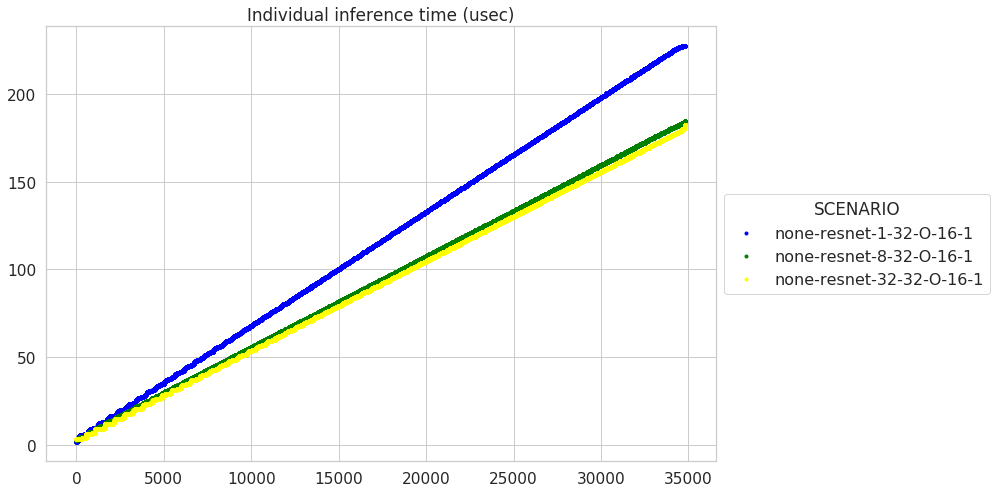

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts    name  dur  issue_start_ns   complete_ns  issue_to_done
0      186614.353  Sample  NaN           947.0  4.021091e+09       4.021090
22196  186614.353  Sample  NaN           947.0  1.517757e+11     151.775742
22195  186614.353  Sample  NaN           947.0  1.517757e+11     151.775742
22194  186614.353  Sample  NaN           947.0  1.517757e+11     151.775742
22193  186614.353  Sample  NaN           947.0  1.517757e+11     151.775742
...           ...     ...  ...             ...           ...            ...
11073  186614.353  Sample  NaN           947.0  7.924312e+10      79.243115
11018  186614.353  Sample  NaN           947.0  7.810064e+10      78.100642
11072  186614.353  Sample  NaN           947.0  7.924312e+10      79.243115
11066  186614.353  Sample  NaN           947.0  7.924312e+10      79.

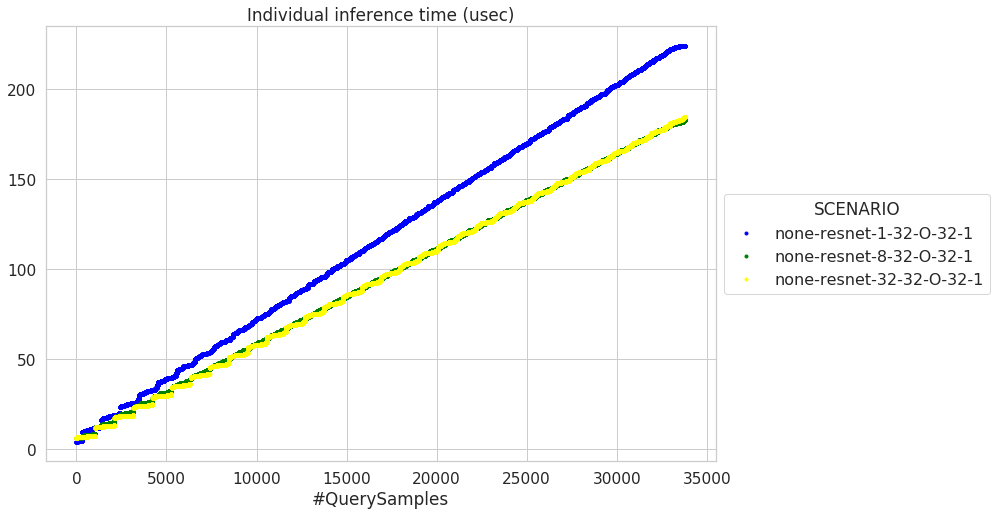

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-64-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
               ts    name  dur  issue_start_ns   complete_ns  issue_to_done
16511  147414.871  Sample  NaN           510.0  1.285439e+11     128.543917
22024  147414.871  Sample  NaN           510.0  1.673888e+11     167.388838
22023  147414.871  Sample  NaN           510.0  1.673888e+11     167.388838
22022  147414.871  Sample  NaN           510.0  1.673888e+11     167.388838
22021  147414.871  Sample  NaN           510.0  1.673888e+11     167.388838
...           ...     ...  ...             ...           ...            ...
11086  147414.871  Sample  NaN           510.0  9.008119e+10      90.081185
11085  147414.871  Sample  NaN           510.0  9.008119e+10      90.081185
11084  147414.871  Sample  NaN           510.0  9.008119e+10      90.081185
11097  147414.871  Sample  NaN           510.0  9.008119e+10      90.

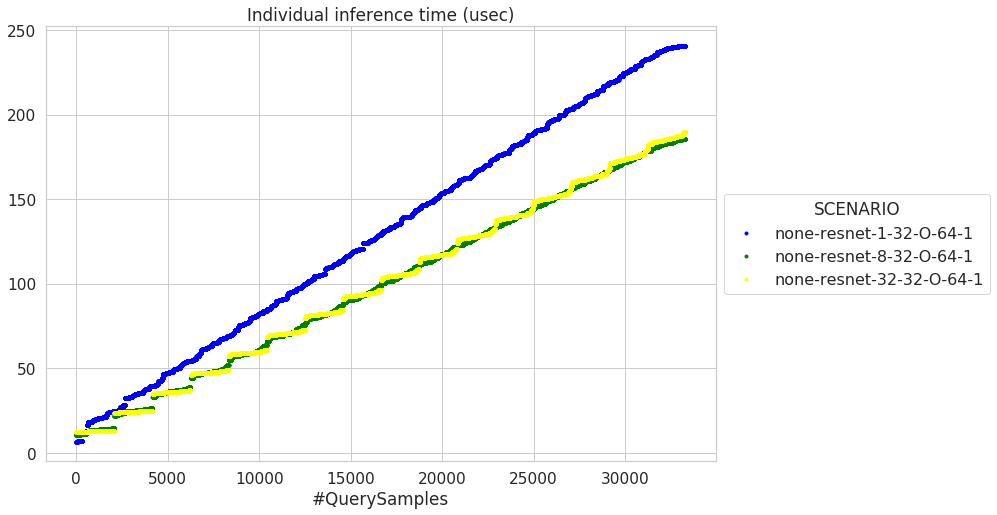

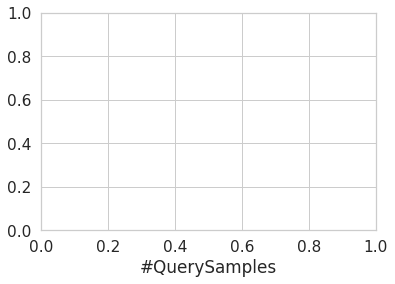

In [77]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
# for batch in ['1','2','4','8','10','16','32']:
for batch in ['16','32','64']:
    SCEN=[
        'none-resnet-1-32-O-'+batch+'-1',
#           'none-resnet-2-32-O-'+batch+'-1',
#                 'none-resnet-4-32-O-'+batch+'-1',
               'none-resnet-8-32-O-'+batch+'-1',
#           'none-resnet-16-32-O-'+batch+'-1',
          'none-resnet-32-32-O-'+batch+'-1'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(df1)
        print(len(df1))
#         df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
        ax.set_title('Individual inference time (usec)');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

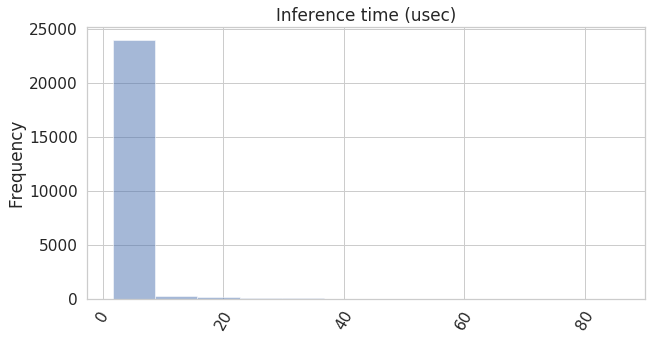

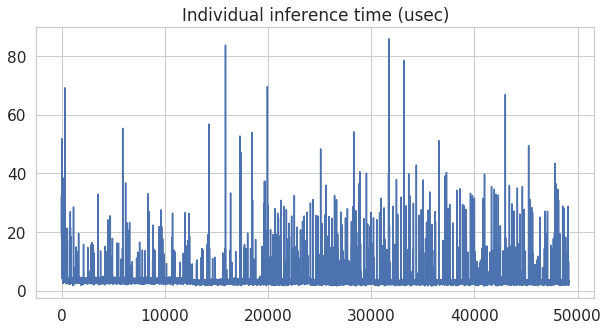

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

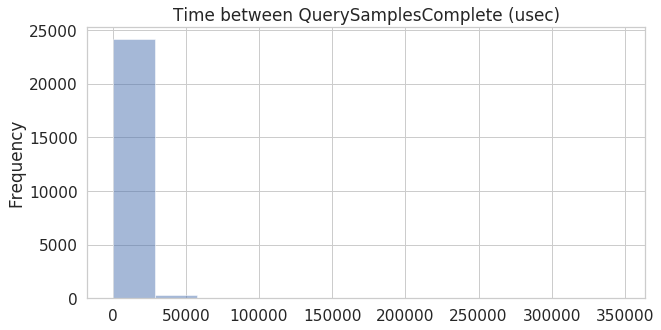

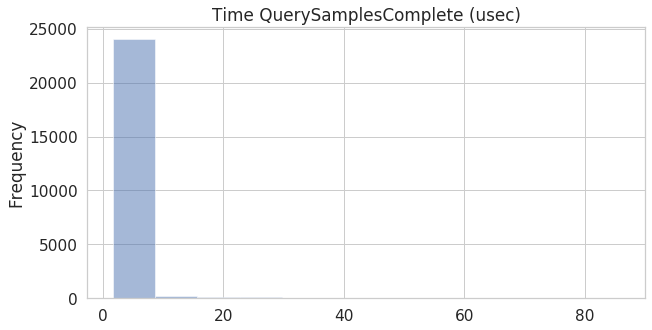

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');